In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

random.seed(42)
np.random.seed(42)



In [3]:
# Function to initialize weights and bias
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.random.randn(hidden_size)
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.random.randn(output_size)
    return W1, b1, W2, b2



In [4]:

# Sigmoid activation function
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Avoid overflow
    return 1 / (1 + np.exp(-z))



In [5]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A1, A2



In [6]:
# Backward propagation
def backward_propagation(X, Y, A1, A2, W2):
    m = X.shape[0]
    dZ2 = A2 - Y.reshape(-1,1)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1) / m
    return dW1, db1, dW2, db2


In [7]:

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


In [8]:

# Training the model
def train_model(X_train, y_train, hidden_size=4, learning_rate=0.01, epochs=10000):
    input_size = X_train.shape[1]
    output_size = 1
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    losses = []
    epsilon = 1e-7  # Small value to avoid log(0)

    for epoch in range(epochs):
        A1, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        # Calculate and store loss
        loss = -np.mean(y_train * np.log(A2 + epsilon) + (1 - y_train) * np.log(1 - A2 + epsilon))
        losses.append(loss)

    return W1, b1, W2, b2, losses


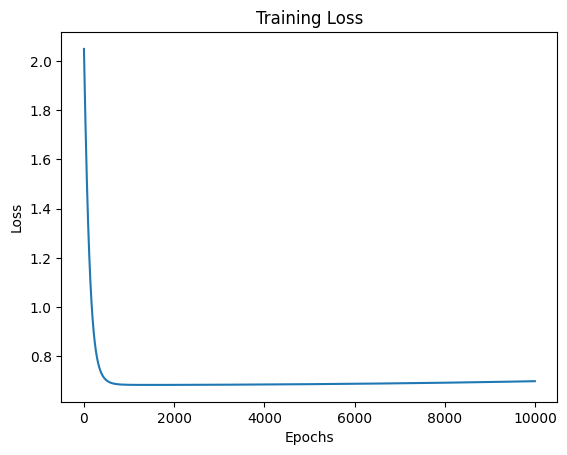

In [9]:

# Generate dataset for XOR gate
sample = 20
x1 = np.where(np.array([random.random() for i in range(sample)]) < 0.5, 0, 1)
x2 = np.where(np.array([random.random() for i in range(sample)]) < 0.5, 0, 1)
y = np.logical_xor(x1, x2).astype(int)

# Combine features into a single array
X = np.column_stack((x1, x2))

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the model
W1, b1, W2, b2, losses = train_model(X_train, y_train)

# Plotting training loss vs epoch curve
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



In [11]:
# Function to predict outputs
def predict(X, W1, b1, W2, b2):
    _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = (A2 > 0.5).astype(int)
    return predictions.flatten()


predictions = predict(X_test, W1, b1, W2, b2)
accuracy = np.mean(predictions == y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8333333333333334
